In [ ]:
#Robot hriday
!wget "https://raw.githubusercontent.com/Robohrriday/Image-Processing-Toolkit--IPT1/refs/heads/main/Week2/img.jpg" -O image.jpeg

--2025-04-09 19:14:44--  https://raw.githubusercontent.com/Robohrriday/Image-Processing-Toolkit--IPT1/refs/heads/main/Week2/img.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39203 (38K) [image/jpeg]
Saving to: ‘image.jpeg’

image.jpeg          100%[===================>]  38.28K  --.-KB/s    in 0.01s   

2025-04-09 19:14:44 (3.10 MB/s) - ‘image.jpeg’ saved [39203/39203]



In [1]:
!wget "https://service.archief.nl/gaf/api/file/v1/render/e3667804-f3b8-4336-ae53-a1b42b6fa731" -O image.jpeg

--2025-04-12 18:58:46--  https://service.archief.nl/gaf/api/file/v1/render/e3667804-f3b8-4336-ae53-a1b42b6fa731
Resolving service.archief.nl (service.archief.nl)... 195.169.53.74, 2001:610:1e0::2:adf:ff4a
Connecting to service.archief.nl (service.archief.nl)|195.169.53.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘image.jpeg’

image.jpeg              [    <=>             ]   1.16M  1.09MB/s    in 1.1s    

2025-04-12 18:58:48 (1.09 MB/s) - ‘image.jpeg’ saved [1219191]



In [ ]:
!wget "https://raw.githubusercontent.com/23110281/host/refs/heads/main/india-skoda-license-plate.jpg" -O image.jpeg

--2025-04-10 16:11:51--  https://raw.githubusercontent.com/23110281/host/refs/heads/main/india-skoda-license-plate.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 571781 (558K) [image/jpeg]
Saving to: ‘image.jpeg’

image.jpeg          100%[===================>] 558.38K  --.-KB/s    in 0.05s   

2025-04-10 16:11:51 (11.4 MB/s) - ‘image.jpeg’ saved [571781/571781]



In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import cv2

def pad_periodic(img, pad_y, pad_x):
    """Periodically wrap‑pad img by pad_y rows and pad_x cols on each side."""
    return np.pad(img,
                  ((pad_y, pad_y), (pad_x, pad_x)),
                  mode='wrap')

# 1) Load & resize
img = cv2.imread('image.jpeg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (128, 128), interpolation=cv2.INTER_AREA)

# 2) Pad
img_p = pad_periodic(img, 1, 1)   # now 130×130

# 3) Flatten to 1D list of ints
flat = img_p.flatten().astype(np.uint8)

# 4) Write .coe
with open('image.coe', 'w') as f:
    f.write('; Auto‑generated COE file\n')
    f.write('memory_initialization_radix=10;\n')
    f.write('memory_initialization_vector=\n')

    N = flat.size
    for i, val in enumerate(flat):
        end = ',\n' if i < N-1 else ';'
        f.write(f'{val}{end}')


array([[121, 124, 146, ..., 125, 121, 124],
       [153, 157, 157, ..., 153, 153, 157],
       [153, 158, 157, ..., 153, 153, 158],
       ...,
       [124, 122, 116, ..., 130, 124, 122],
       [121, 124, 146, ..., 125, 121, 124],
       [153, 157, 157, ..., 153, 153, 157]], dtype=uint8)
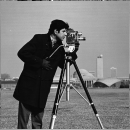

In [ ]:
img_p

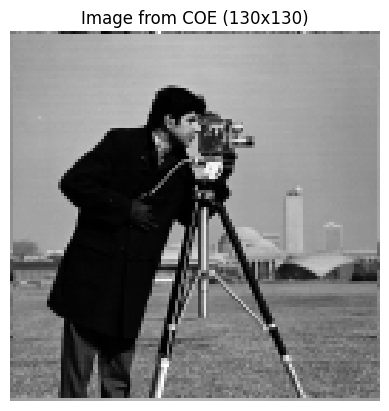

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to read COE file and return data array
def read_coe(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    # Skip comments and header lines until memory_initialization_vector=
    data_lines = []
    start = False
    for line in lines:
        line = line.strip()
        if not start:
            if line.lower().startswith("memory_initialization_vector"):
                # Next lines contain data
                start = True
            continue
        # Remove trailing commas or semicolons
        line = line.rstrip(',;')
        if line:
            data_lines.append(line)
    # Join and split by comma
    all_data = ",".join(data_lines).split(',')
    # Convert to integers
    values = np.array([int(x) for x in all_data if x.strip() != ''])
    return values

# Example usage:
# Suppose the COE file is 'image.coe' and image is 128x128
values = read_coe('/content/image.coe')
# Infer size: assume square
size = int(np.sqrt(len(values)))
img = values.reshape((size, size))

# Plot
plt.figure()
plt.imshow(img, cmap='gray', interpolation='nearest')
plt.title(f'Image from COE ({size}x{size})')
plt.axis('off')
plt.show()



In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

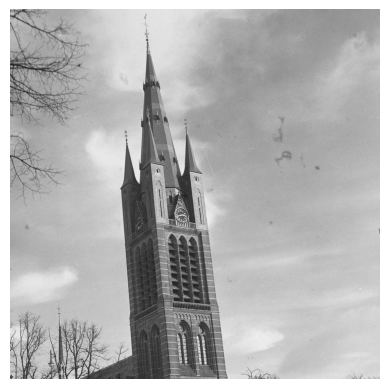

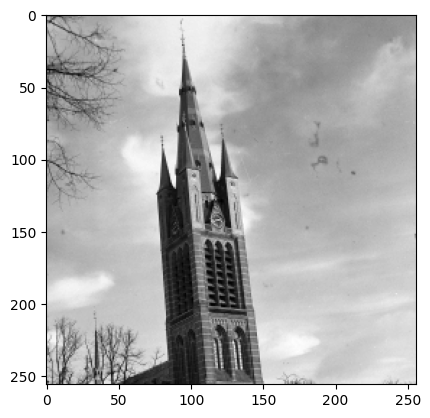

True

In [9]:
# Read image and convert to grayscale
img = cv2.imread('image.jpeg', cv2.IMREAD_GRAYSCALE)

# Define cropping coordinates
x, y, w, h = 700, 220, 2048, 2048
# x, y, w, h = 100, 220, 1024, 1024
img = img[y:y+h, x:x+w]

# Show cropped image
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

# Resize image to 128x128
img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_AREA)

# Show resized image
plt.imshow(img, cmap='gray')
plt.show()

original_img = img.copy()

# write this image to file
cv2.imwrite('img.jpg', img)

array([[149, 137, 138, ..., 156, 154, 155],
       [179, 159, 110, ..., 155, 155, 155],
       [120,  84, 162, ..., 154, 155, 158],
       ...,
       [179, 178, 144, ..., 213, 214, 215],
       [174, 201, 160, ..., 216, 218, 219],
       [ 96, 179, 141, ..., 207, 202, 202]], dtype=uint8)
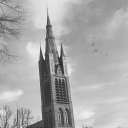

In [ ]:
img

In [ ]:
print(img)

[[ 34  23  34 ...  89 134  86]
 [ 19  26  40 ...  76 147  92]
 [ 19  47  52 ...  44 118 122]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


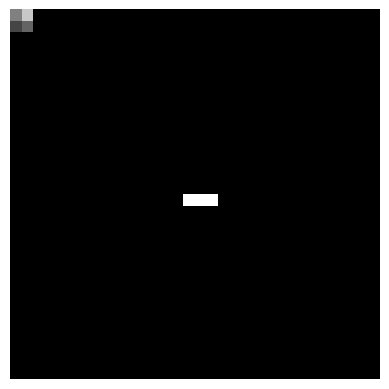

In [ ]:
# create a 256x256 black image (greyscale)

img = np.zeros((32, 32), dtype=np.uint8)

img[0][0] = 128
img[1][0] = 69
img[0][1] = 200
img[1][1] = 100

img[16][15] = 255
img[16][16] = 255
img[16][17] = 255


# plot the image
plt.imshow(img, cmap='grey')
plt.axis('off')
plt.show()

[[  1. 255. 255. 255. 150.]]


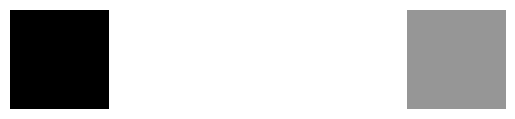

In [ ]:
# psf = np.array([[0,1,1,1,1]]).astype(np.float64)
psf = np.array([[1,255,255,255,150]]).astype(np.float64)
# psf /= psf.sum()

print(psf)

plt.imshow(psf, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
sigma = 10
k = np.array([
    [np.exp(-((1**2 + 1**2) / (2 * sigma**2))), np.exp(-((0**2 + 1**2) / (2 * sigma**2))), np.exp(-((1**2 + 1**2) / (2 * sigma**2)))],
    [np.exp(-((1**2 + 0**2) / (2 * sigma**2))), np.exp(-((0**2 + 0**2) / (2 * sigma**2))), np.exp(-((1**2 + 0**2) / (2 * sigma**2)))],
    [np.exp(-((1**2 + 1**2) / (2 * sigma**2))), np.exp(-((0**2 + 1**2) / (2 * sigma**2))), np.exp(-((1**2 + 1**2) / (2 * sigma**2)))]
]) / (2 * np.pi * sigma**2)
print(k*1000000)

k = np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]])

[[1575.71324948 1583.61154502 1575.71324948]
 [1583.61154502 1591.54943092 1583.61154502]
 [1575.71324948 1583.61154502 1575.71324948]]


[10 14 21 31]
10
Recovered x from frequency domain: [[ 33.  21.  17. ...  54.  55.  52.]
 [ 57.  39.  32. ... 177. 116. 100.]
 [ 28.  18.  20. ... 162. 107.  64.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
MSE between original and recovered x: 113.75147623471163
PSNR between original and recovered x: -11.017145320782129


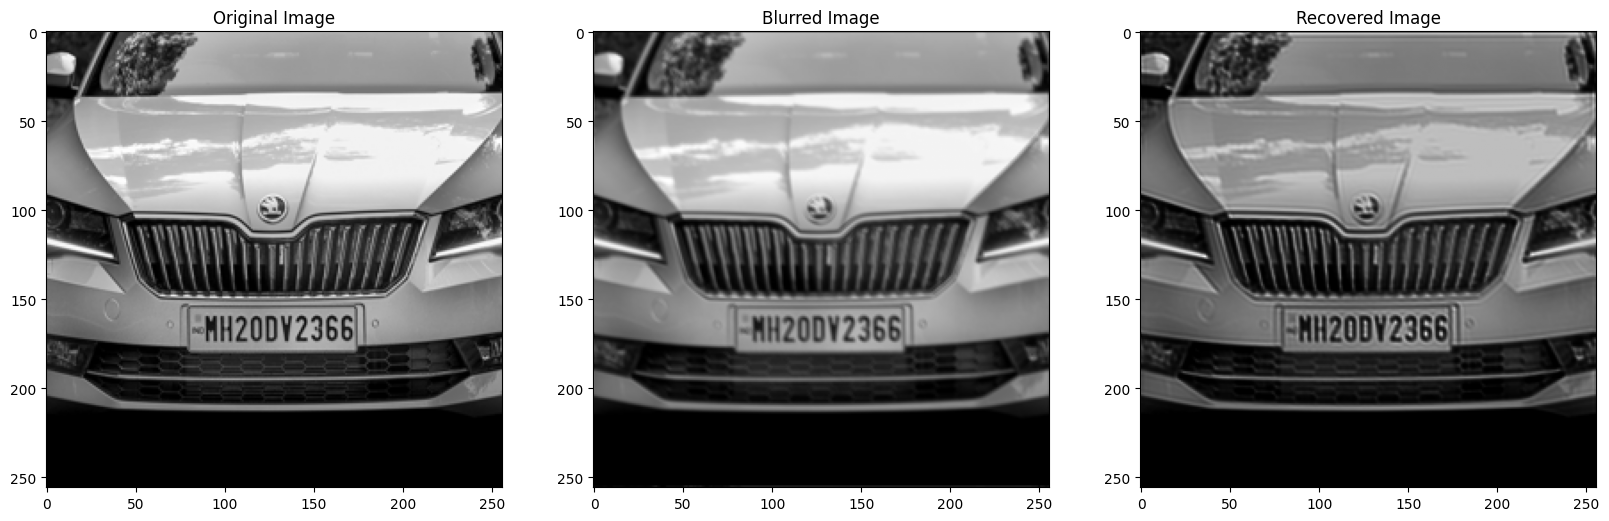

Recovered Kernel:
[[0.09504546 0.12385902 0.10438869]
 [0.09436479 0.07337003 0.11185822]
 [0.0757829  0.15444039 0.16689051]]
14
Recovered x from frequency domain: [[ 32.  20.  17. ...  47.  55.  53.]
 [ 57.  40.  33. ... 179. 116. 105.]
 [ 28.  18.  20. ... 161. 105.  64.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
MSE between original and recovered x: 122.71598030530929
PSNR between original and recovered x: -11.34658611612986


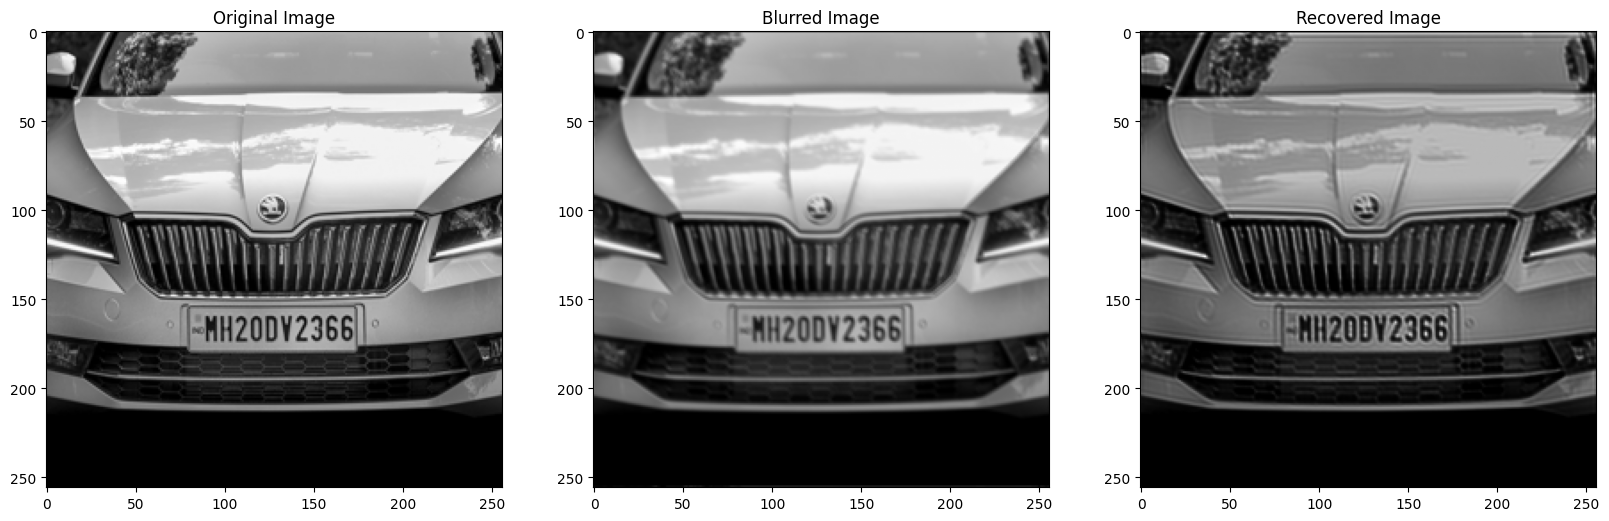

Recovered Kernel:
[[0.09504546 0.12385902 0.10438869]
 [0.09436479 0.07337003 0.11185822]
 [0.0757829  0.15444039 0.16689051]]
21
Recovered x from frequency domain: [[ 30.  19.  19. ...  39.  56.  54.]
 [ 55.  41.  34. ... 180. 117. 111.]
 [ 28.  18.  20. ... 159. 103.  66.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
MSE between original and recovered x: 136.46848535697822
PSNR between original and recovered x: -11.807898619684533


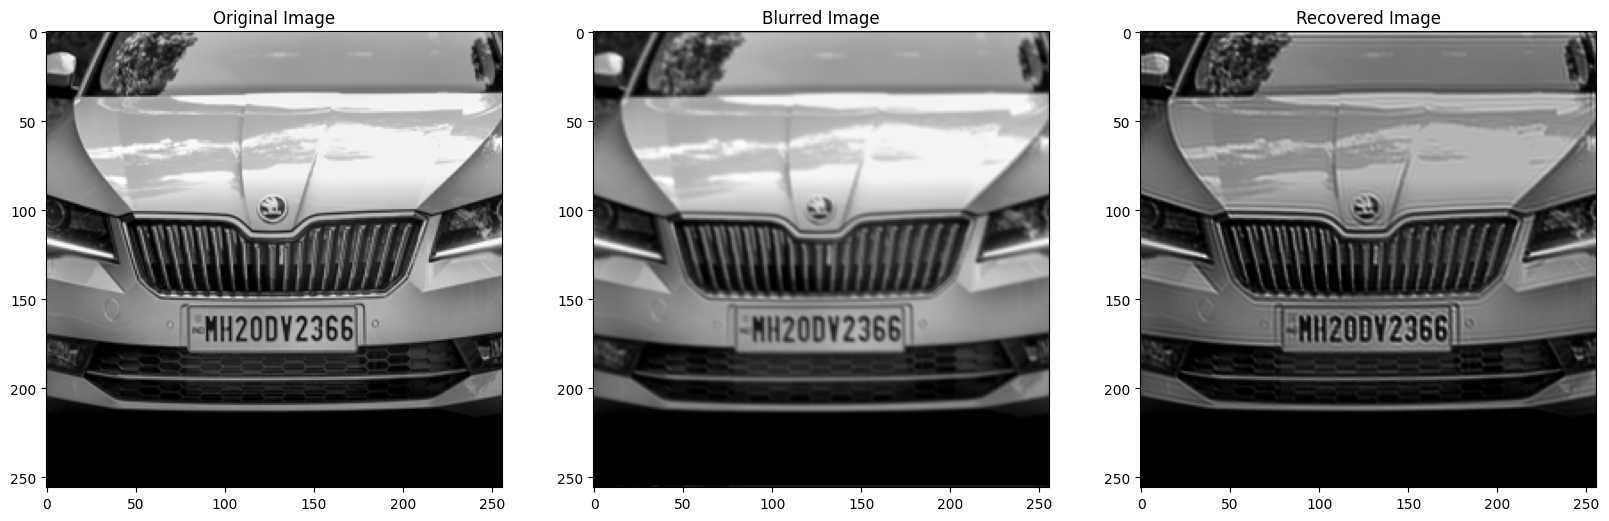

Recovered Kernel:
[[0.09504546 0.12385902 0.10438869]
 [0.09436479 0.07337003 0.11185822]
 [0.0757829  0.15444039 0.16689051]]
31
Recovered x from frequency domain: [[ 28.  17.  20. ...  30.  58.  55.]
 [ 52.  43.  35. ... 181. 118. 116.]
 [ 29.  18.  21. ... 156. 102.  66.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
MSE between original and recovered x: 154.37920412586118
PSNR between original and recovered x: -12.343462882335762


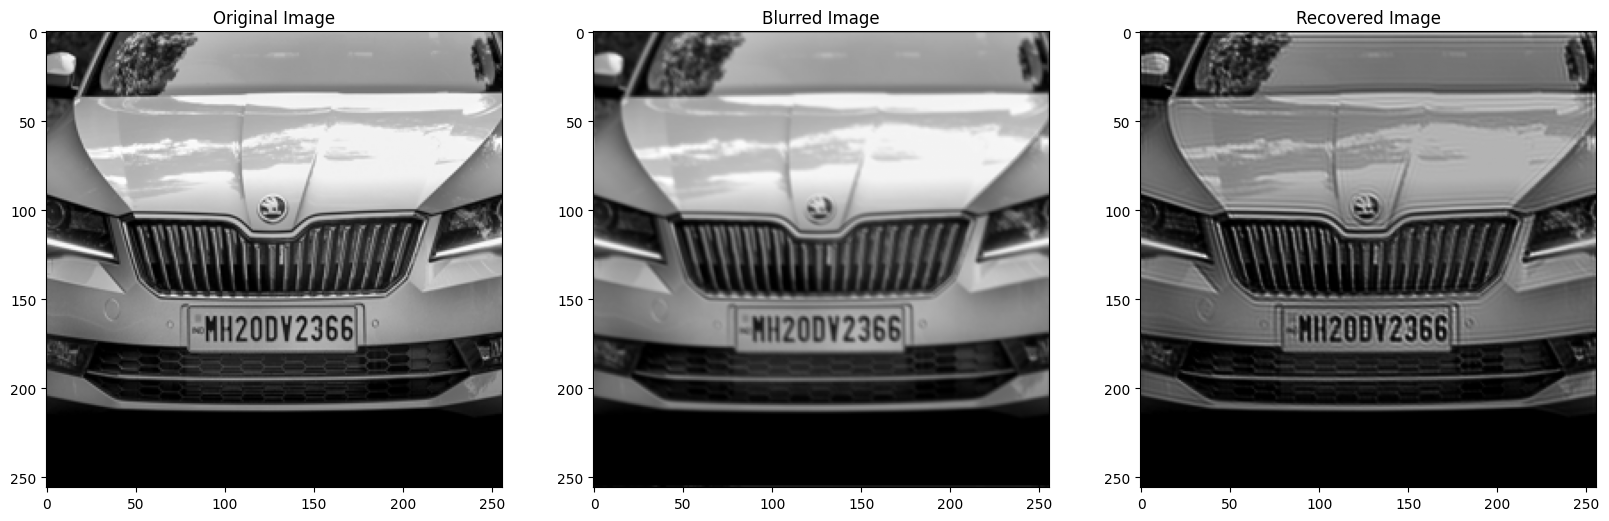

Recovered Kernel:
[[0.09504546 0.12385902 0.10438869]
 [0.09436479 0.07337003 0.11185822]
 [0.0757829  0.15444039 0.16689051]]


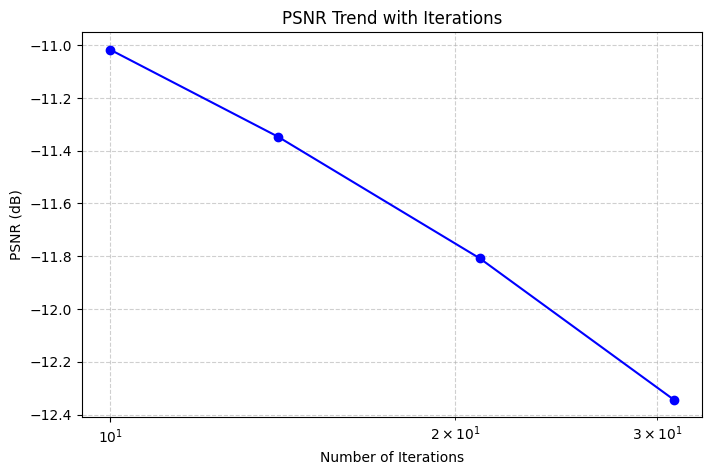

In [ ]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

def richardson_lucy_blind_deconvolution(B, K_init, num_iter=50, eps=1e-8):
    """
    Blind Richardson–Lucy deconvolution.

    Args:
        B : 2D array
            Observed blurred image.
        K_init : 2D array
            Initial PSF estimate (should sum to 1).
        num_iter : int
            Number of alternating RL iterations.
        eps : float
            Small constant to avoid division by zero.

    Returns:
        I_est, K_est : 2D arrays
            Estimated latent image and PSF.
    """
    # Initialize estimates
    I_est = B.copy().astype(np.float64)
    K_est = K_init.copy().astype(np.float64)
    K_est /= K_est.sum()

    for t in range(num_iter):
        # ---- Image update ----
        # Compute current blurred estimate of I_est
        conv_IK = convolve2d(I_est, K_est, mode='same', boundary='wrap')
        # Ratio B / (I_est * K_est)
        ratio_I = B / (conv_IK + eps)
        # Correlate with flipped kernel
        corr_ratio_K = convolve2d(ratio_I, np.rot90(K_est, 2),
                                  mode='same', boundary='wrap')
        # Update I_est
        I_est *= corr_ratio_K

        # ---- Kernel update ----
        # Compute blurred estimate using updated I_est
        conv_IK2 = convolve2d(I_est, K_est, mode='same', boundary='wrap')
        # Ratio B / (I_est * K_est)
        ratio_K = B / (conv_IK2 + eps)
        # Correlate with flipped image patch
        corr_ratio_I = convolve2d(ratio_K, np.rot90(I_est, 2),
                                  mode='valid', boundary='wrap')
        # Update kernel estimate
        K_est *= corr_ratio_I
        # Enforce non-negativity and normalize
        K_est = np.maximum(K_est, 0)
        K_est /= (K_est.sum() + eps)

    return I_est, K_est


def evaluate2(num_iter, x, y, k_init):
    # Perform blind deconvolution
    x_recovered, k_recovered = richardson_lucy_blind_deconvolution(y, k_init, num_iter)

    # PSNR
    mse_recovery = np.mean((x - x_recovered) ** 2)
    max_val = np.max(x)
    psnr_recovery = 10 * np.log10(max_val**2 / mse_recovery)

    print("Recovered x from frequency domain:", np.round(x_recovered))
    print("MSE between original and recovered x:", mse_recovery)
    print("PSNR between original and recovered x:", psnr_recovery)

    # Display results
    plt.figure(figsize=(20, 10))
    plt.subplot(131), plt.imshow(x, cmap='gray'), plt.title("Original Image")
    plt.subplot(132), plt.imshow(y, cmap='gray'), plt.title("Blurred Image")
    plt.subplot(133), plt.imshow(x_recovered, cmap='gray'), plt.title("Recovered Image")
    plt.show()

    print("Recovered Kernel:")
    print(k_recovered)

    return psnr_recovery

# Define Gaussian blur kernel
# sigma = 10
# k = np.array([
#     [np.exp(-((1**2 + 1**2) / (2 * sigma**2))), np.exp(-((0**2 + 1**2) / (2 * sigma**2))), np.exp(-((1**2 + 1**2) / (2 * sigma**2)))],
#     [np.exp(-((1**2 + 0**2) / (2 * sigma**2))), np.exp(-((0**2 + 0**2) / (2 * sigma**2))), np.exp(-((1**2 + 0**2) / (2 * sigma**2)))],
#     [np.exp(-((1**2 + 1**2) / (2 * sigma**2))), np.exp(-((0**2 + 1**2) / (2 * sigma**2))), np.exp(-((1**2 + 1**2) / (2 * sigma**2)))]
# ]) / (2 * np.pi * sigma**2)
k = np.array([[0, 1, 0],
              [1, 1, 1],
              [0, 1, 1]], dtype=np.float32)

# k = np.array([[0, 0, 1, 0, 0],
#               [0, 1, 0, 1, 0],
#               [1, 0, 0, 0, 1],
#               [0, 1, 0, 1, 0],
#               [0, 0, 1, 0, 0]], dtype=np.float32)

# k = np.array([[0, 0, 1, 0, 0],
#               [0, 0, 1, 0, 0],
#               [0, 0, 1, 0, 0],
#               [0, 0, 1, 0, 0],
#               [0, 0, 1, 0, 0]], dtype=np.float32)
k /= k.sum()
# k = psf

# k = np.array([[1, 1, 1, 1]]).astype(np.float64)
# k /= k.sum()

# Load an example image (grayscale 256x256)
x = img  # Assuming 'img' is a 256x256 image

# Generate blurred image
y = convolve2d(x, k, mode='same', boundary='wrap')

# Initialize the kernel estimate, for a fixed seed
np.random.seed(0)
k_init = np.abs(np.random.rand(*k.shape))
k_init /= np.sum(k_init)

iters = np.logspace(1, 1.5, num=4, dtype=int)  # 30 values between 10^0.5 and 10^4
print(iters)
psnr_values = []
for num_iter in iters:
    print(num_iter)
    psnr = evaluate2(num_iter, x, y, k_init)
    psnr_values.append(psnr)

plt.figure(figsize=(8, 5))
plt.plot(iters, psnr_values, marker='o', linestyle='-', color='b')
plt.xscale("log")  # Use log scale
plt.xlabel("Number of Iterations")
plt.ylabel("PSNR (dB)")
plt.title("PSNR Trend with Iterations")
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.show()

In [ ]:
print(*k.shape)

3 3



y:  [[138.25 150.75 165.5  ... 165.75 168.25 163.75]
 [156.   151.75 145.75 ... 154.75 154.75 145.75]
 [157.25 169.25 159.5  ... 155.25 154.5  158.  ]
 ...
 [164.   149.5  182.25 ... 216.5  215.5  193.  ]
 [126.75 136.   163.5  ... 208.75 211.25 169.75]
 [139.   137.   158.75 ... 189.75 187.   168.5 ]] 


k_init:  [[0.13513514 0.         0.08108108]
 [0.08108108 0.18918919 0.24324324]
 [0.08108108 0.13513514 0.05405405]] 

[1]
1
B shape:  (256, 256)
B padded shape:  (258, 258)


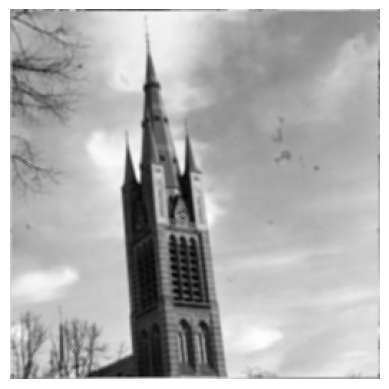

initial values: 
I_est:  [[168.5  139.   137.   ... 187.   168.5  139.  ]
 [163.75 138.25 150.75 ... 168.25 163.75 138.25]
 [145.75 156.   151.75 ... 154.75 145.75 156.  ]
 ...
 [169.75 126.75 136.   ... 211.25 169.75 126.75]
 [168.5  139.   137.   ... 187.   168.5  139.  ]
 [163.75 138.25 150.75 ... 168.25 163.75 138.25]]
K_est:  [[0.13513514 0.         0.08108108]
 [0.08108108 0.18918919 0.24324324]
 [0.08108108 0.13513514 0.05405405]]
conv_IK [[147.66216216 151.7972973  147.43918919 ... 175.73648649 163.39189189
  157.16216216]
 [151.10135135 149.53378378 146.81081081 ... 166.85810811 160.89189189
  152.33108108]
 [152.97972973 152.70945946 154.04054054 ... 157.64864865 154.07432432
  151.75675676]
 ...
 [151.52027027 153.18918919 146.38513514 ... 199.13513514 178.75
  163.70945946]
 [146.91891892 149.37162162 144.66216216 ... 184.35810811 165.59459459
  156.41891892]
 [147.42567568 149.38513514 147.18918919 ... 172.77027027 161.20945946
  157.25      ]]
ratio_I [[1.14111833 0.91569

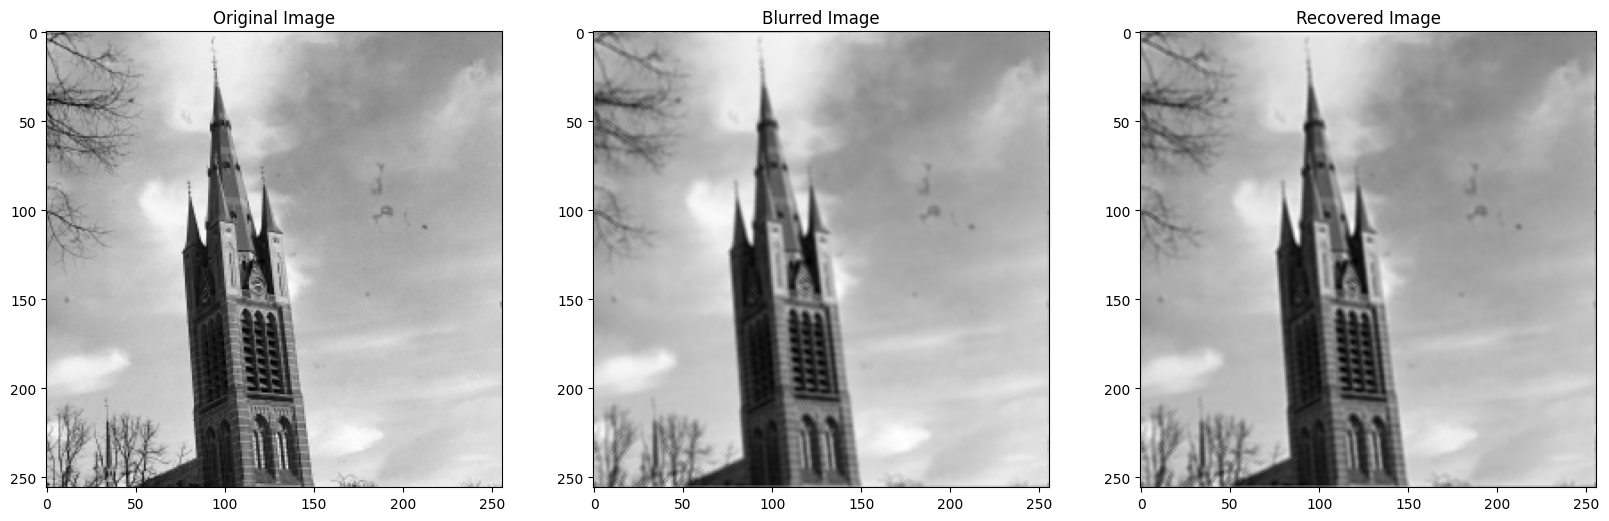

Recovered Kernel:
[[0.13513514 0.         0.08108108]
 [0.08108108 0.18918919 0.24324324]
 [0.08108108 0.13513514 0.05405405]]


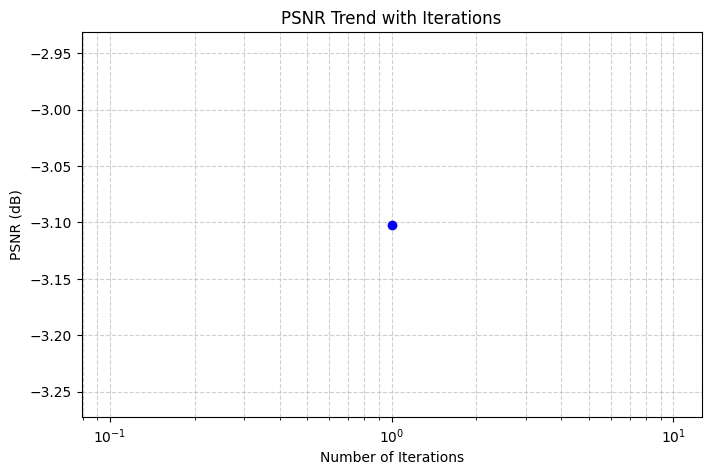

In [ ]:
import numpy as np
from scipy.signal import convolve2d

def pad_periodic(img, pad_y, pad_x):
    """Periodically wrap-pad img by pad_y rows and pad_x cols on each side."""
    return np.pad(img,
                  ((pad_y, pad_y), (pad_x, pad_x)),
                  mode='wrap')

def crop_center(img, out_h, out_w):
    """Crop the center out_h×out_w region from img."""
    h, w = img.shape
    start_y = (h - out_h) // 2
    start_x = (w - out_w) // 2
    return img[start_y:start_y+out_h, start_x:start_x+out_w]

def richardson_lucy_blind_deconvolution3(B, K_init, num_iter=50, eps=1e-8):
    """
    Blind Richardson–Lucy deconvolution with periodic boundary padding.
    """
    # Determine padding size from kernel shape
    kh, kw = K_init.shape
    pad_y, pad_x = kh//2, kw//2

    # Pad the blurred image
    B_pad = pad_periodic(B, pad_y, pad_x)
    print("B shape: ", B.shape)
    print("B padded shape: ", B_pad.shape)


    # plot the padded image
    plt.imshow(B_pad, cmap='gray')
    plt.axis('off')
    plt.show()

    # Initialize estimates on padded grid
    I_est = B_pad.copy().astype(np.float64)
    K_est = K_init.copy().astype(np.float64)

    print("initial values: ")
    print("I_est: ", I_est)
    print("K_est: ", K_est)
    # K_est /= K_est.sum()

    SCALE = 256

    print("===================================================================")

    for t in range(num_iter):
        # --- Image update on padded grid ---
        conv_IK = convolve2d(I_est, K_est, mode='same', boundary='wrap')
        print("conv_IK", conv_IK)
        ratio_I = B_pad / (conv_IK + eps)
        # ratio_I = np.maximum(np.round(ratio_I * SCALE).astype(np.int32), 1)
        print("ratio_I", ratio_I)
        # print("ratio_I_q", ratio_I_q)


        corr_ratio_K = convolve2d(ratio_I, np.rot90(K_est, 2),
                                  mode='same', boundary='wrap')
        print(">>>>>>>>>>>")
        print("corr_ratio_K", corr_ratio_K)
        I_est *= corr_ratio_K
        print("I_est", I_est)

        # --- Kernel update (valid mode) ---
        conv_IK2 = convolve2d(I_est, K_est, mode='same', boundary='wrap')
        print("conv_IK2", conv_IK2)
        ratio_K = B_pad / (conv_IK2 + eps)

        corr_ratio_I = convolve2d(ratio_K, np.rot90(I_est, 2),
                                  mode='valid', boundary='wrap')
        K_est *= corr_ratio_I
        K_est = np.maximum(K_est, 0)
        K_est /= (K_est.sum() + eps)

        # print all the variables in this loop to check if they have int values or not
        print("B_pad: ", B_pad)
        print("I_est: ", I_est)
        print("K_est: ", K_est)
        print("conv_IK: ", conv_IK)
        print("ratio_I: ", ratio_I)
        print("corr_ratio_K: ", corr_ratio_K)
        print("corr_ratio_I: ", corr_ratio_I)


    # After convergence, crop the latent image back to original size
    I_crop = crop_center(I_est, B.shape[0], B.shape[1])
    return I_crop, K_est

def evaluate3(num_iter, x, y, k_init):
    # Perform blind deconvolution
    x_recovered, k_recovered = richardson_lucy_blind_deconvolution3(y, k_init, num_iter)

    # PSNR
    mse_recovery = np.mean((x - x_recovered) ** 2)
    max_val = np.max(x)
    psnr_recovery = 10 * np.log10(max_val**2 / mse_recovery)

    print("Recovered x from frequency domain:", np.round(x_recovered))
    print("MSE between original and recovered x:", mse_recovery)
    print("PSNR between original and recovered x:", psnr_recovery)

    # Display results
    plt.figure(figsize=(20, 10))
    plt.subplot(131), plt.imshow(x, cmap='gray'), plt.title("Original Image")
    plt.subplot(132), plt.imshow(y, cmap='gray'), plt.title("Blurred Image")
    plt.subplot(133), plt.imshow(x_recovered, cmap='gray'), plt.title("Recovered Image")
    plt.show()

    print("Recovered Kernel:")
    print(k_recovered)

    return psnr_recovery


# Define Gaussian blur kernel
# sigma = 10
# k = np.array([
#     [np.exp(-((1**2 + 1**2) / (2 * sigma**2))), np.exp(-((0**2 + 1**2) / (2 * sigma**2))), np.exp(-((1**2 + 1**2) / (2 * sigma**2)))],
#     [np.exp(-((1**2 + 0**2) / (2 * sigma**2))), np.exp(-((0**2 + 0**2) / (2 * sigma**2))), np.exp(-((1**2 + 0**2) / (2 * sigma**2)))],
#     [np.exp(-((1**2 + 1**2) / (2 * sigma**2))), np.exp(-((0**2 + 1**2) / (2 * sigma**2))), np.exp(-((1**2 + 1**2) / (2 * sigma**2)))]
# ]) / (2 * np.pi * sigma**2)
# k /= k.sum()
k = np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]]).astype(np.float64)
k /= k.sum()
# k = psf

# k = np.array([[1, 1, 1, 1]]).astype(np.float64)
# k /= k.sum()

# Load an example image (grayscale 256x256)
x = img  # Assuming 'img' is a 256x256 image

# Generate blurred image
y = convolve2d(x, k, mode='same', boundary='wrap')
print("\ny: ", y, '\n')

# Initialize the kernel estimate, for a fixed seed
np.random.seed(0)
k_init = np.abs(np.random.randint(0, 10, k.shape)).astype(np.float64)
k_init /= np.sum(k_init)

print("\nk_init: ", k_init, "\n")

# iters = np.logspace(1, 2.5, num=4, dtype=int)  # 30 values between 10^0.5 and 10^4
iters = [1]
print(iters)
psnr_values = []
for num_iter in iters:
    print(num_iter)
    psnr = evaluate3(num_iter, x, y, k_init)
    psnr_values.append(psnr)

plt.figure(figsize=(8, 5))
plt.plot(iters, psnr_values, marker='o', linestyle='-', color='b')
plt.xscale("log")  # Use log scale
plt.xlabel("Number of Iterations")
plt.ylabel("PSNR (dB)")
plt.title("PSNR Trend with Iterations")
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.show()

# For verilog

In [ ]:
import numpy as np
from scipy.signal import convolve2d

def pad_periodic(img, pad_y, pad_x):
    """Periodically wrap-pad img by pad_y rows and pad_x cols on each side."""
    return np.pad(img,
                  ((pad_y, pad_y), (pad_x, pad_x)),
                  mode='wrap')

def crop_center(img, out_h, out_w):
    """Crop the center out_h×out_w region from img."""
    h, w = img.shape
    start_y = (h - out_h) // 2
    start_x = (w - out_w) // 2
    return img[start_y:start_y+out_h, start_x:start_x+out_w]

def richardson_lucy_blind_deconvolution3(B, K_init, num_iter=50, eps=1e-8):
    """
    Blind Richardson–Lucy deconvolution with periodic boundary padding.
    """
    # Determine padding size from kernel shape
    kh, kw = K_init.shape
    pad_y, pad_x = kh//2, kw//2

    # Pad the blurred image
    B_pad = pad_periodic(B, pad_y, pad_x)

    # plot the padded image
    plt.imshow(B_pad, cmap='gray')
    plt.axis('off')
    plt.show()

    # Initialize estimates on padded grid
    I_est = B_pad.copy().astype(np.float64)
    K_est = K_init.copy().astype(np.float64)
    # K_est /= K_est.sum()


    print("===================================================================")

    for t in range(num_iter):
        # --- Image update on padded grid ---
        conv_IK = convolve2d(I_est, K_est, mode='same', boundary='wrap')
        ratio_I = B_pad / (conv_IK + eps)
        print("ratio_I", ratio_I)


        corr_ratio_K = convolve2d(ratio_I, np.rot90(K_est, 2),
                                  mode='same', boundary='wrap')
        I_est *= corr_ratio_K

        # --- Kernel update (valid mode) ---
        conv_IK2 = convolve2d(I_est, K_est, mode='same', boundary='wrap')
        ratio_K = B_pad / (conv_IK2 + eps)

        corr_ratio_I = convolve2d(ratio_K, np.rot90(I_est, 2),
                                  mode='valid', boundary='wrap')
        K_est *= corr_ratio_I
        K_est = np.maximum(K_est, 0)
        K_est /= (K_est.sum() + eps)


    # crop the latent image back to original size
    I_crop = crop_center(I_est, B.shape[0], B.shape[1])
    return I_crop, K_est


k = np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]]).astype(np.float64)
k /= k.sum()

# k = np.array([[1, 1, 1, 1]]).astype(np.float64)
# k /= k.sum()

# Load an example image (grayscale 256x256)
x = img  # Assuming 'img' is a 256x256 image

# Generate blurred image
y = convolve2d(x, k, mode='same', boundary='wrap')
print("\ny: ", y, '\n')

# Initialize the kernel estimate, for a fixed seed
np.random.seed(0)
k_init = np.abs(np.random.randint(0, 10, k.shape)).astype(np.float64)
k_init /= np.sum(k_init)

print("\nk_init: ", k_init, "\n")

recovered_image, recovered_kernel = richardson_lucy_blind_deconvolution3(y, k_init, num_iter=25)

## NLSS

In [ ]:
import math
from scipy.signal import convolve2d

# ----------------------------
# Low‑level routines from scratch
# ----------------------------

def zeros(shape):
    """Create a zero matrix or vector."""
    if len(shape) == 1:
        return [0.0 for _ in range(shape[0])]
    elif len(shape) == 2:
        return [[0.0 for _ in range(shape[1])] for _ in range(shape[0])]
    else:
        raise ValueError("Only 1D or 2D supported")

def shape(mat):
    """Return shape of vector/matrix."""
    if isinstance(mat[0], list):
        return (len(mat), len(mat[0]))
    else:
        return (len(mat),)

def mat_transpose(A):
    """Transpose of a 2D list."""
    m, n = shape(A)
    T = zeros((n, m))
    for i in range(m):
        for j in range(n):
            T[j][i] = A[i][j]
    return T

def mat_mul(A, B):
    """Matrix multiplication A·B for 2D lists."""
    m, p = shape(A)
    p2, n = shape(B)
    assert p == p2, "Incompatible shapes"
    C = zeros((m, n))
    for i in range(m):
        for j in range(n):
            s = 0.0
            for k in range(p):
                s += A[i][k] * B[k][j]
            C[i][j] = s
    return C

def dot(u, v):
    """Dot product of two same‑length lists."""
    assert len(u) == len(v)
    s = 0.0
    for i in range(len(u)):
        s += u[i] * v[i]
    return s

def norm(u):
    """Euclidean norm of a vector."""
    return math.sqrt(dot(u, u))

def subtract(u, v):
    """Elementwise u - v."""
    return [u[i] - v[i] for i in range(len(u))]

def scalar_mul(u, c):
    """Multiply vector u by scalar c."""
    return [c * ui for ui in u]

def qr_decompose(A):
    """
    Classical Gram–Schmidt QR decomposition of A (m×n).
    Returns Q (m×n) and R (n×n).
    """
    m, n = shape(A)
    Q = zeros((m, n))
    R = zeros((n, n))
    for j in range(n):
        # v = A[:,j]
        v = [A[i][j] for i in range(m)]
        for i in range(j):
            qi = [Q[r][i] for r in range(m)]
            R[i][j] = dot(qi, v)
            v = subtract(v, scalar_mul(qi, R[i][j]))
        R[j][j] = norm(v)
        if R[j][j] > 1e-12:
            for r in range(m):
                Q[r][j] = v[r] / R[j][j]
    return Q, R

def eigenvalues_qr(B, iterations=50):
    """
    Compute eigenvalues of symmetric B (n×n) via QR iterations.
    Returns list of diagonal entries (approx eigenvalues).
    """
    A = [row[:] for row in B]  # copy
    for _ in range(iterations):
        Q, R = qr_decompose(A)
        A = mat_mul(R, Q)
    # eigenvalues ≈ diagonal of A
    return [A[i][i] for i in range(len(A))]

def nuclear_norm(A):
    """
    Compute nuclear norm = sum singular values of A.
    We form B = A^T A, get its eigenvalues λ_i, then σ_i = sqrt(λ_i).
    """
    At = mat_transpose(A)
    B = mat_mul(At, A)
    eigs = eigenvalues_qr(B)
    s = 0.0
    for lam in eigs:
        if lam > 0:
            s += math.sqrt(lam)
    return s

def argsort(lst):
    """Return list of indices that would sort lst ascending."""
    return sorted(range(len(lst)), key=lambda i: lst[i])

# ----------------------------
# NLSS from scratch
# ----------------------------

def nlss_from_scratch(image, patch_size=5, k=10):
    """
    Compute the NLSS prior exactly as described, using only the above routines.
    """
    # 1) Sobel kernels
    Sx = [[ 1, 0, -1],
          [ 2, 0, -2],
          [ 1, 0, -1]]
    Sy = [[ 1, 2,  1],
          [ 0, 0,  0],
          [-1,-2, -1]]
    # 2) Gradient via convolution
    Gx = convolve2d(image, Sx, mode='same', boundary='symm')
    Gy = convolve2d(image, Sy, mode='same', boundary='symm')
    H, W = len(image), len(image[0])
    G  = [[math.sqrt(Gx[i][j]**2 + Gy[i][j]**2) for j in range(W)] for i in range(H)]

    # 3) Extract non‑overlapping patches
    ni, nj = H // patch_size, W // patch_size
    patches = []
    for bi in range(ni):
        for bj in range(nj):
            v = []
            for di in range(patch_size):
                for dj in range(patch_size):
                    v.append(G[bi*patch_size+di][bj*patch_size+dj])
            patches.append(v)
    M = len(patches)
    dim = patch_size * patch_size

    # 4) Normalize patches
    Pn = []
    for p in patches:
        nrm = norm(p)
        if nrm < 1e-12: nrm = 1.0
        Pn.append([pi / nrm for pi in p])

    # 5) Pairwise squared distances
    sq = [dot(p, p) for p in Pn]
    D2 = [[sq[i] + sq[j] - 2*dot(Pn[i], Pn[j]) for j in range(M)] for i in range(M)]

    # 6) For each patch build NLSS matrix and sum nuclear norms
    total = 0.0
    for i in range(M):
        idx = argsort(D2[i])[:(k+1)]
        # build A of size (dim x (k+1))
        A = zeros((dim, k+1))
        for col, j in enumerate(idx):
            for row in range(dim):
                A[row][col] = Pn[j][row]
        total += nuclear_norm(A)

    return total / M


[ 10  31 100 316]
10
Recovered x from frequency domain: [[ 60.  32.  24. ... 139.  90.  68.]
 [ 44.  21.  21. ... 151.  96.  63.]
 [ 37.  14.  14. ... 153. 116.  58.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
MSE between original and recovered x: 172.11662036018575
PSNR between original and recovered x: -12.815803003548073
NLSS (x):  0


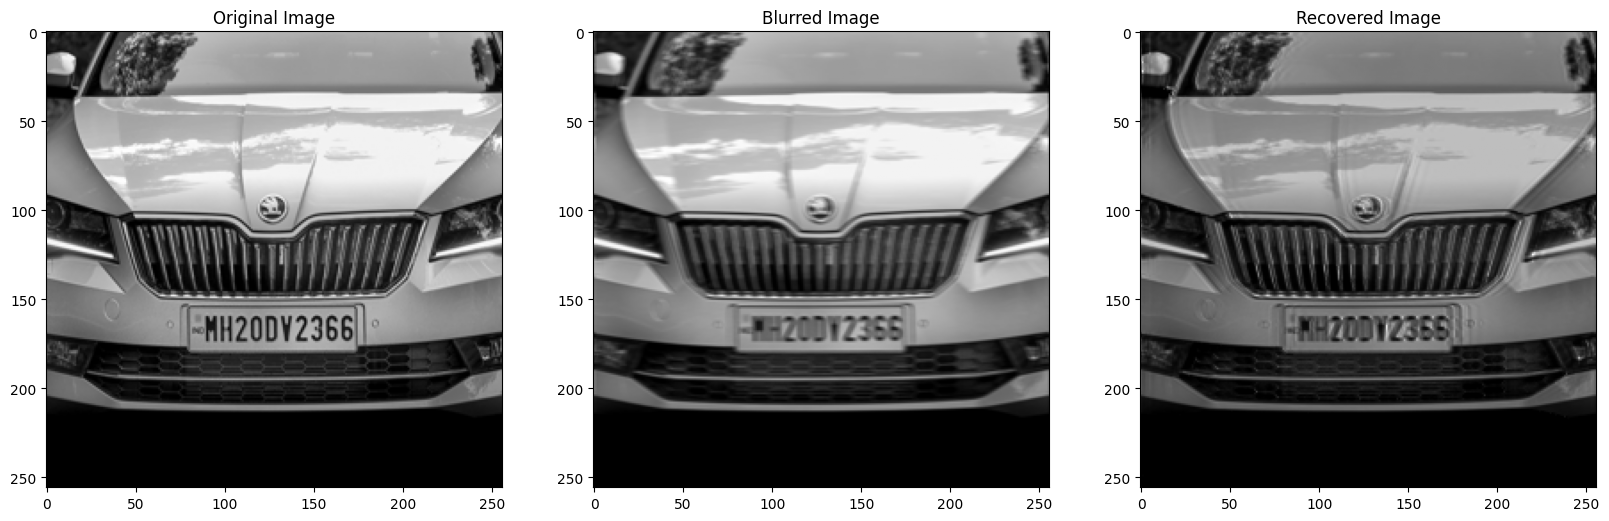

Recovered Kernel:
[[0.25 0.25 0.25 0.25]]
31
Recovered x from frequency domain: [[ 69.  16.  41. ... 113.  59.  93.]
 [ 47.  10.  39. ... 175.  46.  93.]
 [ 57.   6.  24. ... 255.  46.  65.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
MSE between original and recovered x: 770.2636790302081
PSNR between original and recovered x: -19.323969102073445
NLSS (x):  0


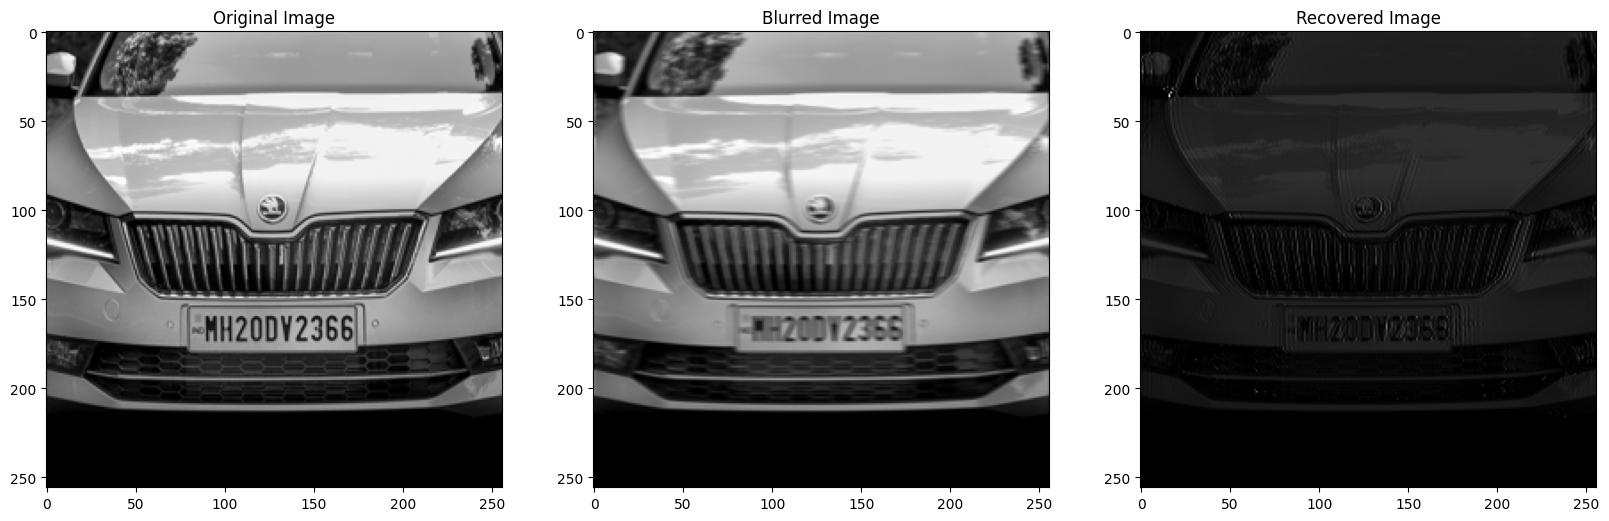

Recovered Kernel:
[[0.25 0.25 0.25 0.25]]
100
Recovered x from frequency domain: [[ 10. 120.   4. ...   0. 318.   1.]
 [  0. 101.   0. ...   1. 258.  25.]
 [  0.  20.  25. ...  20.   1. 243.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
MSE between original and recovered x: 13054.400867241591
PSNR between original and recovered x: -31.615144351974813
NLSS (x):  0


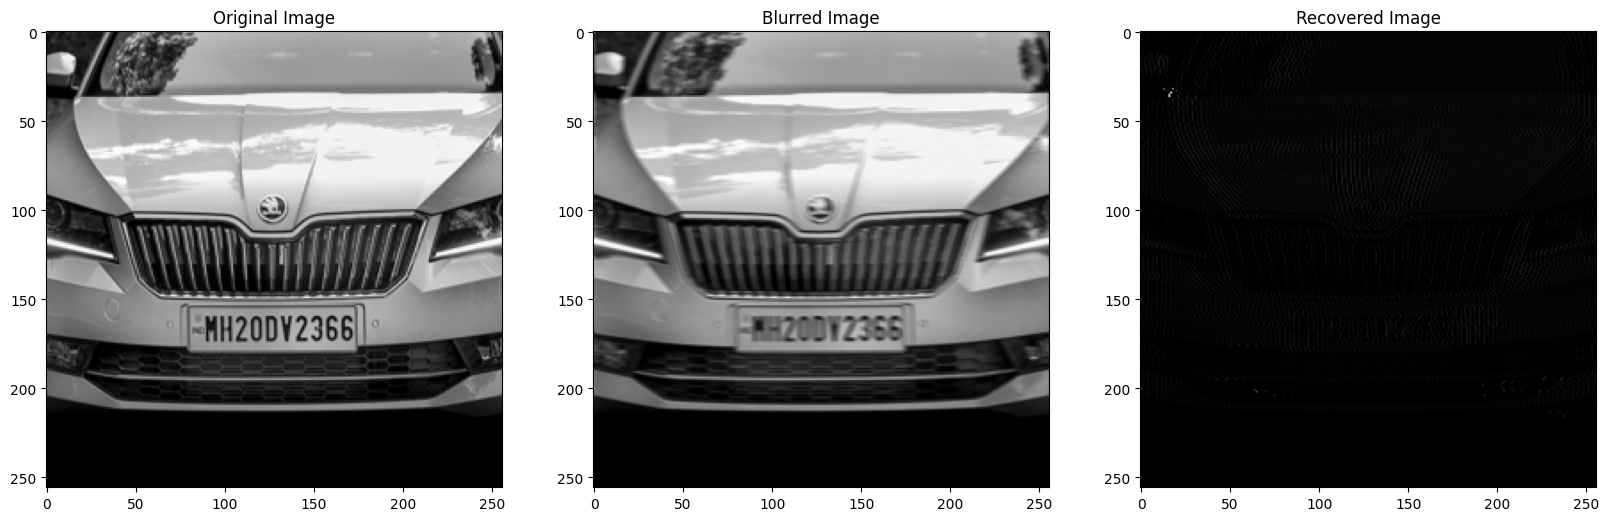

Recovered Kernel:
[[0.25 0.25 0.25 0.25]]
316
Recovered x from frequency domain: [[195.   0.   0. ... 401.   0.   0.]
 [164.   0.   0. ... 412.   0.   0.]
 [  0.  64.   0. ...   4. 354.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
MSE between original and recovered x: 59100291164.837524
PSNR between original and recovered x: -98.17347111052266
NLSS (x):  0


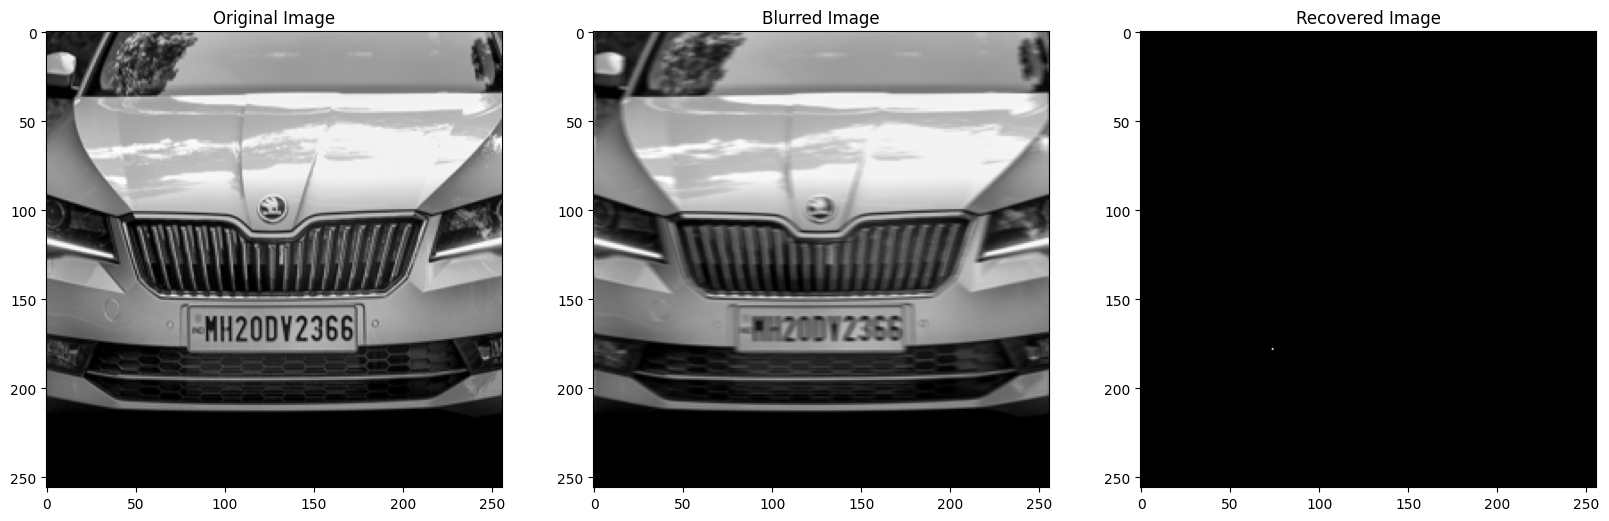

Recovered Kernel:
[[0.25 0.25 0.25 0.25]]


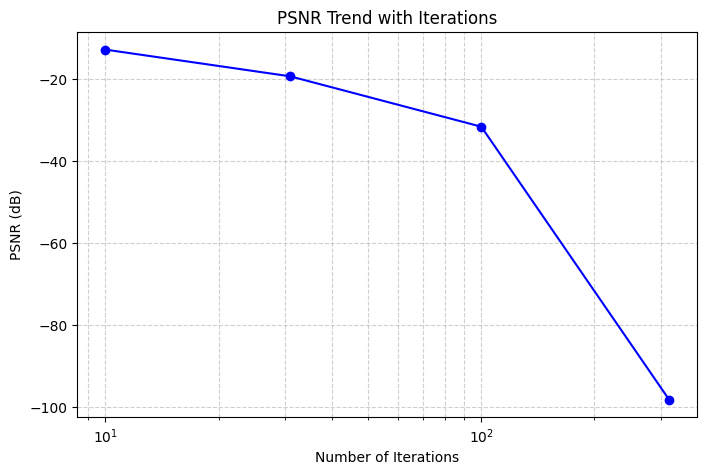

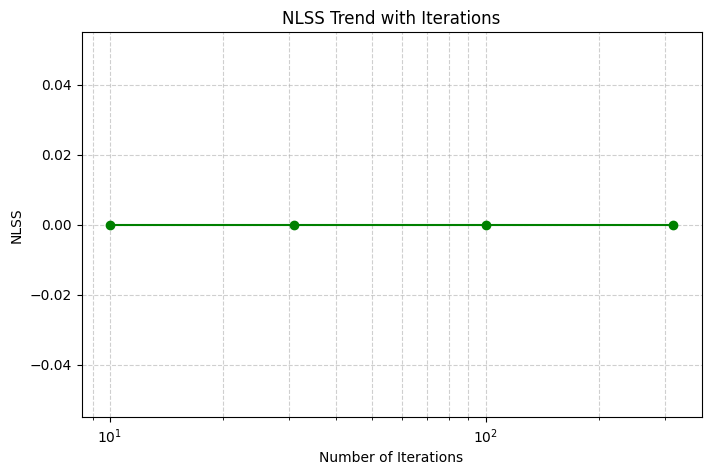

In [ ]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

def richardson_lucy_blind_deconvolution(y, k_init, num_iter=50):
    """
    Perform Richardson-Lucy blind deconvolution to estimate both x and k.

    Parameters:
    y : np.array
        Blurred image
    k_init : np.array
        Initial guess for the blur kernel
    num_iter : int
        Number of iterations to run

    Returns:
    x_est : np.array
        Estimated sharp image
    k_est : np.array
        Estimated blur kernel
    """

    x_est = np.copy(y).astype(np.float64)  # Initialize x as y
    # k_est = np.copy(k_init).astype(np.float64)  # Initial kernel guess
    k_est = np.array([[1, 1, 1, 1]]).astype(np.float64)

    for i in range(num_iter):
        # Compute blurred estimate of x
        x_blurred = convolve2d(x_est, k_est, mode='same', boundary='wrap')
        relative_blur_x = y / (x_blurred + 1e-8)
        x_est *= convolve2d(relative_blur_x, k_est[::-1, ::-1], mode='same', boundary='wrap')

        # Compute blurred estimate of k
        k_blurred = convolve2d(x_est, k_est, mode='same', boundary='wrap')
        relative_blur_k = y / (k_blurred + 1e-8)
        k_update = convolve2d(x_est[::-1, ::-1], relative_blur_k, mode='valid', boundary='wrap')

        # Normalize the kernel to sum to 1
        k_est *= k_update
        k_est /= np.sum(k_est)

    return x_est, k_est

def evaluate2(num_iter, x, y, k_init):
    # Perform blind deconvolution
    x_recovered, k_recovered = richardson_lucy_blind_deconvolution(y, k_init, num_iter)

    # PSNR
    mse_recovery = np.mean((x - x_recovered) ** 2)
    max_val = np.max(x)
    psnr_recovery = 10 * np.log10(max_val**2 / mse_recovery)

    # NLSS
    nlss_value = nlss_from_scratch(x_recovered)
    # nlss_value = 0

    print("Recovered x from frequency domain:", np.round(x_recovered))
    print("MSE between original and recovered x:", mse_recovery)
    print("PSNR between original and recovered x:", psnr_recovery)
    print("NLSS (x): ", nlss_value)

    # Display results
    plt.figure(figsize=(20, 10))
    plt.subplot(131), plt.imshow(x, cmap='gray'), plt.title("Original Image")
    plt.subplot(132), plt.imshow(y, cmap='gray'), plt.title("Blurred Image")
    plt.subplot(133), plt.imshow(x_recovered, cmap='gray'), plt.title("Recovered Image")
    plt.show()

    print("Recovered Kernel:")
    print(k_recovered)

    return psnr_recovery, nlss_value

# Define Gaussian blur kernel
sigma = 10
k = np.array([
    [np.exp(-((1**2 + 1**2) / (2 * sigma**2))), np.exp(-((0**2 + 1**2) / (2 * sigma**2))), np.exp(-((1**2 + 1**2) / (2 * sigma**2)))],
    [np.exp(-((1**2 + 0**2) / (2 * sigma**2))), np.exp(-((0**2 + 0**2) / (2 * sigma**2))), np.exp(-((1**2 + 0**2) / (2 * sigma**2)))],
    [np.exp(-((1**2 + 1**2) / (2 * sigma**2))), np.exp(-((0**2 + 1**2) / (2 * sigma**2))), np.exp(-((1**2 + 1**2) / (2 * sigma**2)))]
]) / (2 * np.pi * sigma**2)
k /= k.sum()

# # motion blur kernel
# k = np.array([[1, 1, 1, 1]]).astype(np.float64)
# k /= k.sum()

# Load an example image (grayscale 256x256)
x = img  # Assuming 'img' is a 256x256 image

# Generate blurred image
y = convolve2d(x, k, mode='same', boundary='wrap')

# # motion blur kernel
# k1 = np.array([[1, 1, 1, 1]]).astype(np.float64)
# k1 /= k.sum()

# y = convolve2d(y, k1, mode='same', boundary='wrap')

# Initialize the kernel estimate, for a fixed seed
np.random.seed(0)
k_init = np.abs(np.random.rand(*k.shape))
k_init /= np.sum(k_init)

iters = np.logspace(1, 2.5, num=4, dtype=int)  # 30 values between 10^0.5 and 10^4
print(iters)
psnr_values = []
nlss_values = []

for num_iter in iters:
    print(num_iter)
    psnr, nlss_value = evaluate2(num_iter, x, y, k_init)
    psnr_values.append(psnr)
    nlss_values.append(nlss_value)

plt.figure(figsize=(8, 5))
plt.plot(iters, psnr_values, marker='o', linestyle='-', color='b')
plt.xscale("log")  # Use log scale
plt.xlabel("Number of Iterations")
plt.ylabel("PSNR (dB)")
plt.title("PSNR Trend with Iterations")
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(iters, nlss_values, marker='o', linestyle='-', color='g')
plt.xscale("log")  # Use log scale
plt.xlabel("Number of Iterations")
plt.ylabel("NLSS")
plt.title("NLSS Trend with Iterations")
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.show()

## Extras


In [ ]:
# def richardson_lucy_blind_deconvolution(y, k_init, num_iter=50):

#     x_est = np.copy(y)  # Initialize x as y
#     k_est = np.copy(k_init)  # Initial kernel guess

#     for i in range(num_iter):
#         # Compute blurred estimate of x
#         x_blurred = convolve2d(x_est, k_est, mode='same', boundary='wrap')
#         relative_blur_x = y / (x_blurred + 1e-4)
#         x_est *= convolve2d(relative_blur_x, k_est[::-1, ::-1], mode='same', boundary='wrap')

#         # Compute blurred estimate of k
#         k_blurred = convolve2d(x_est, k_est, mode='same', boundary='wrap')
#         relative_blur_k = y / (k_blurred + 1e-4)
#         k_update = convolve2d(x_est[::-1, ::-1], relative_blur_k, mode='valid', boundary='wrap')

#         # Normalize the kernel to sum to 1
#         k_est *= k_update
#         k_est /= np.sum(k_est)

#     return x_est, k_est

Reconstructed image range: 0.0 301.2610778808594
Recovered kernel: [[0.095047   0.12385559 0.10438538]
 [0.09436035 0.07336426 0.11186218]
 [0.07579041 0.1544342  0.16688538]]


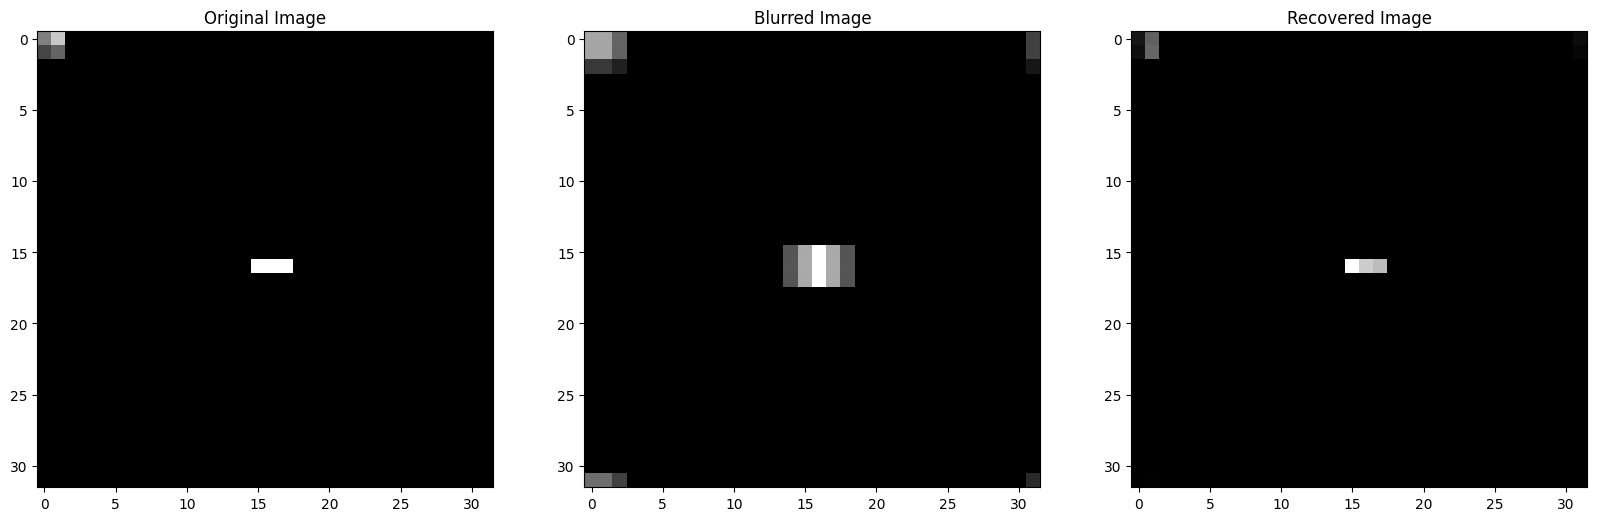

In [ ]:
import numpy as np
from scipy.signal import convolve2d

# Fixed‐point parameters
FRAC_BITS = 16
ONE = 1 << FRAC_BITS # Q16.16 “1.0”

def to_fixed(x):
    """Convert a float or numpy array to Q16.16 fixed‐point integer."""
    return np.round(x * ONE).astype(np.int64)

def to_float(x_fixed):
    """Convert Q16.16 fixed‐point integer back to float (for final output)."""
    return x_fixed.astype(np.float64) / ONE

def fp_mul(a, b):
    """Fixed‐point multiply a * b >> FRAC_BITS, rounded."""
    tmp = a.astype(np.int64) * b.astype(np.int64)
    # rounding: add ½ LSB before shifting
    return ((tmp + (1 << (FRAC_BITS-1))) >> FRAC_BITS).astype(np.int64)

def fp_div(a, b):
    """Fixed‐point divide (a<<FRAC_BITS) / b, rounded."""
    tmp = (a.astype(np.int64) << FRAC_BITS)
    # rounding: add ½ divisor
    return ((tmp + (b//2)) // b).astype(np.int64)

def pad_periodic_fixed(img_fixed, pad_y, pad_x):
    """Periodic wrap padding on fixed‐point array."""
    return np.pad(img_fixed,
                  ((pad_y, pad_y), (pad_x, pad_x)),
                  mode='wrap')

def crop_center_fixed(img_fixed, out_h, out_w):
    h, w = img_fixed.shape
    sy = (h - out_h) // 2
    sx = (w - out_w) // 2
    return img_fixed[sy:sy+out_h, sx:sx+out_w]

def richardson_lucy_blind_fixed(B, K_init, num_iter=50):
    """
    Blind Richardson–Lucy deconvolution in fixed‐point Q16.16.
    B: 2D numpy array of uint8 or float [0..1]
    K_init: 2D numpy float array [sum=1]
    """
    # convert inputs to fixed‐point
    B_f = to_fixed(B.astype(np.float64))
    Kf = to_fixed(K_init.astype(np.float64))
    # normalize kernel in fixed‐point
    Kf = fp_div(Kf, np.sum(Kf))

    kh, kw = Kf.shape
    pad_y, pad_x = kh//2, kw//2

    B_pad = pad_periodic_fixed(B_f, pad_y, pad_x)
    I_est = B_pad.copy() # start with blurred image
    eps = 1 # small epsilon in Q16.16 (~1/65536)

    for t in range(num_iter):
        # --- Image update ---
        conv_IK = to_fixed(convolve2d(to_float(I_est), to_float(Kf),
                                      mode='same', boundary='wrap'))
        # ratio_I = B_pad / (conv_IK + eps)
        denom = conv_IK + eps
        ratio_I = fp_div(B_pad, denom)

        # correlate ratio with rotated kernel
        K_rot = np.rot90(Kf, 2)
        corr_I = to_fixed(convolve2d(to_float(ratio_I), to_float(K_rot),
                                     mode='same', boundary='wrap'))
        # I_est *= corr_I
        I_est = fp_mul(I_est, corr_I)

        # --- Kernel update ---
        conv_IK2 = to_fixed(convolve2d(to_float(I_est), to_float(Kf),
                                       mode='same', boundary='wrap'))
        denom2 = conv_IK2 + eps
        ratio_K = fp_div(B_pad, denom2)

        I_rot = np.rot90(I_est, 2)
        corr_K = to_fixed(convolve2d(to_float(ratio_K), to_float(I_rot),
                                     mode='valid', boundary='wrap'))
        # update kernel
        Kf = fp_mul(Kf, corr_K)
        # enforce nonnegativity
        Kf = np.maximum(Kf, 0)
        # renormalize
        Kf = fp_div(Kf, np.sum(Kf) + eps)

    # crop back to original size
    I_crop = crop_center_fixed(I_est, B.shape[0], B.shape[1])
    # convert back to float for output
    return to_float(I_crop), to_float(Kf)

# Example usage:
if __name__ == "__main__":
    # assume img is a 256×256 float array in [0,1]
    # img = np.random.rand(256,256).astype(np.float64)
    sigma = 10.0
    # build Gaussian PSF
    k = np.zeros((3,3), dtype=np.float64)
    for dy in (-1,0,1):
        for dx in (-1,0,1):
            k[dy+1,dx+1] = np.exp(-(dx*dx+dy*dy)/(2*sigma*sigma))
    k /= (2*np.pi*sigma*sigma)
    k /= k.sum()

    # blur image
    y = convolve2d(img, k, mode='same', boundary='wrap')
    # random init kernel
    np.random.seed(0)
    k0 = np.abs(np.random.rand(3,3))
    k0 /= k0.sum()

    I_rec, K_rec = richardson_lucy_blind_fixed(y, k0, num_iter=30)
    print("Reconstructed image range:", I_rec.min(), I_rec.max())
    print("Recovered kernel:", K_rec)

    # plot the image
    plt.figure(figsize=(20, 10))
    plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title("Original Image")
    plt.subplot(132), plt.imshow(y, cmap='gray'), plt.title("Blurred Image")
    plt.subplot(133), plt.imshow(I_rec, cmap='gray'), plt.title("Recovered Image")
    plt.show()


## Extras 2


In [ ]:
import numpy as np

def convolve2d_flat(img_flat, ker_flat, n, l):
    pad = l // 2
    Np = n + 2*pad
    img_pad = np.zeros(Np * Np, dtype=img_flat.dtype)

    for idx in range(n*n):
        y = idx // n
        x = idx %  n
        y_p = y + pad
        x_p = x + pad
        img_pad[y_p * Np + x_p] = img_flat[idx]

    ker_flip = np.zeros_like(ker_flat)
    for k_idx in range(l*l):
        ky = k_idx // l
        kx = k_idx %  l
        ky_f = (l-1) - ky
        kx_f = (l-1) - kx
        ker_flip[ky_f * l + kx_f] = ker_flat[k_idx]

    out_flat = np.zeros(n * n, dtype=img_flat.dtype)

    for out_idx in range(n*n):
        y = out_idx // n
        x = out_idx %  n

        acc = 0
        for ky in range(l):
            for kx in range(l):
                yy = y + ky
                xx = x + kx
                acc += ker_flip[ky*l + kx] * img_pad[yy*Np + xx]
        out_flat[out_idx] = acc

    return out_flat

n = 5
l = 3
img = np.arange(n*n, dtype=np.float32)
ker = np.array([0, -1, 0,
               -1,  5,-1,
                0, -1, 0], dtype=np.float32)

out = convolve2d_flat(img, ker, n, l)
img2 = img.reshape(n, n)
import cv2
out2 = cv2.filter2D(img2, -1, ker.reshape(l, l), borderType=cv2.BORDER_CONSTANT)

print(img2)
print(out)
print(out2)


[[ 0.  1.  2.  3.  4.]
 [ 5.  6.  7.  8.  9.]
 [10. 11. 12. 13. 14.]
 [15. 16. 17. 18. 19.]
 [20. 21. 22. 23. 24.]]
[-6. -3. -1.  1.  8.  9.  6.  7.  8. 19. 19. 11. 12. 13. 29. 29. 16. 17.
 18. 39. 64. 47. 49. 51. 78.]
[[-6. -3. -1.  1.  8.]
 [ 9.  6.  7.  8. 19.]
 [19. 11. 12. 13. 29.]
 [29. 16. 17. 18. 39.]
 [64. 47. 49. 51. 78.]]


In [ ]:
from scipy.signal import convolve2d
print(convolve2d(img2, ker.reshape(l, l), mode='same', fillvalue=0))

[[-6. -3. -1.  1.  8.]
 [ 9.  6.  7.  8. 19.]
 [19. 11. 12. 13. 29.]
 [29. 16. 17. 18. 39.]
 [64. 47. 49. 51. 78.]]


In [ ]:
import numpy as np

def conv_flat(I, K, W, w):
    """
    Perform 2D convolution by treating both image and kernel as flattened 1D arrays.

    Parameters
    ----------
    I : array_like, shape (N,)
        The flattened, zero-padded image. N = H * W.
    K : array_like, shape (L,)
        The flattened kernel. L = h * w.
    W : int
        Width of the image.
    w : int
        Width of the kernel.

    Returns
    -------
    O : ndarray, shape (N,)
        The flattened output image (same length as I).
    """
    I = np.asarray(I)
    K = np.asarray(K)
    N = I.size
    L = K.size
    h = L // w
    # kernel center offsets
    p = h // 2
    q = w // 2

    O = np.zeros_like(I, dtype=np.float64)

    for n in range(N):
        acc = 0.0
        row = n // W
        col = n % W
        for m in range(L):
            di = (m // w) - p
            dj = (m %  w) - q
            ni = row + di
            nj = col + dj
            if 0 <= ni < W and 0 <= nj < W:
                idx = ni * W + nj
                acc += I[idx] * K[m]
        O[n] = acc


    return O



def conv_flat_3x3(I, K, W):
    """
    2D convolution for 3x3 kernel on flattened, zero-padded image.

    Parameters
    ----------
    I : array_like, shape (N,)
        Flattened, zero-padded image.
    K : array_like, shape (9,)
        Flattened 3×3 kernel.
    W : int
        Width of the padded image.

    Returns
    -------
    O : ndarray, shape (N,)
        Flattened output image.
    """
    I = np.asarray(I)
    K = np.asarray(K)

    O = np.zeros_like(I, dtype=np.float64)

    for n in range(I.size):
        acc = 0.0
        row = n // W
        col = n % W
        for m in range(9):
            di = (m // 3) - 1
            dj = (m %  3) - 1
            ni = row + di
            nj = col + dj
            if 0 <= ni < W and 0 <= nj < W:
                idx = ni * W + nj
                acc += I[idx] * K[m]
        O[n] = acc

    return O


In [ ]:
import numpy as np

n = 5   # original image size
k = 3   # kernel size
p = 1   # k // 2  # padding size

# Original image (flattened)
I = np.arange(n * n, dtype=np.float32)
img2d = I.reshape(n, n)

# Create padded image: shape (n + 2p, n + 2p) since p = 1 therefore:
padded_img = np.zeros((n + 2, n + 2), dtype=np.float32)

# Copy original image into center
padded_img[p:p+n, p:p+n] = img2d

# Flatten for convolution
I_flat = padded_img.flatten()

# Kernel
K = np.array([0, -1, 0,
               -1,  5,-1,
                0, -1, 0], dtype=np.float32)

# Dimensions
W = n + 2*p  # padded image width
w = k        # kernel width

# Run convolution
O = conv_flat_3x3(I_flat, K, W)
O2d = np.array(O).reshape(W, W)
valid_output = O2d[p:p+n, p:p+n]

# Print result
print(valid_output)


[[-6. -3. -1.  1.  8.]
 [ 9.  6.  7.  8. 19.]
 [19. 11. 12. 13. 29.]
 [29. 16. 17. 18. 39.]
 [64. 47. 49. 51. 78.]]


In [ ]:
import numpy as np

n = 128
k = 3
p = 1

# Original image
# I = np.arange(n * n, dtype=np.uint8)
# img2d = I.reshape(n, n)
img2d = img

# Padding
padded_img = np.zeros((n + 2, n + 2), dtype=np.uint8)
padded_img[p:p+n, p:p+n] = img2d
I_flat = padded_img.flatten()

# Kernel
# K = np.array([0, -1, 0, -1, 5, -1, 0, -1, 0], dtype=np.int8)
K = np.array([0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=np.int8)

# Write image.hex
with open("image.hex", "w") as f:
    for val in I_flat:
        f.write(f"{val:02x}\n")

# Write kernel.hex
with open("kernel.hex", "w") as f:
    for val in K:
        f.write(f"{np.uint8(val):02x}\n")  # Correctly cast to uint8


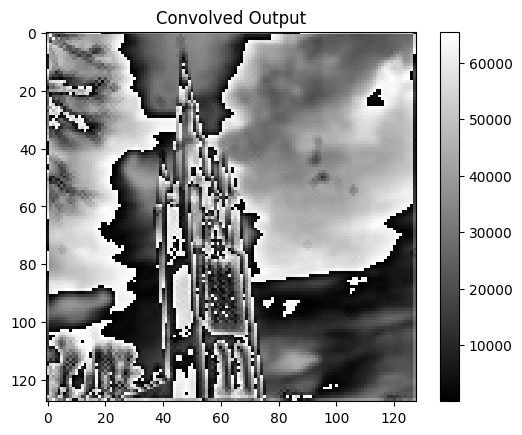

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Settings
n = 128  # original image size
p = 1  # padding
W = n + 2*p  # padded width

# Read hex output file
with open("output.hex", "r") as f:
    hex_values = f.read().splitlines()

# Convert hex strings to uint8 integers
output_vals = np.array([int(x, 16) for x in hex_values], dtype=np.uint16)

# Reshape to 2D image
output_2d = output_vals.reshape(W, W)

# Crop valid output (remove padding)
valid_output = output_2d[p:p+n, p:p+n]

# Display result
plt.imshow(valid_output, cmap='gray', interpolation='nearest')
plt.title("Convolved Output")
plt.colorbar()
plt.show()


In [ ]:
original_image.astype(np.float16)

array([[149., 137., 138., ..., 156., 154., 155.],
       [179., 159., 110., ..., 155., 155., 155.],
       [120.,  84., 162., ..., 154., 155., 158.],
       ...,
       [179., 178., 144., ..., 213., 214., 215.],
       [174., 201., 160., ..., 216., 218., 219.],
       [ 96., 179., 141., ..., 207., 202., 202.]], dtype=float16)

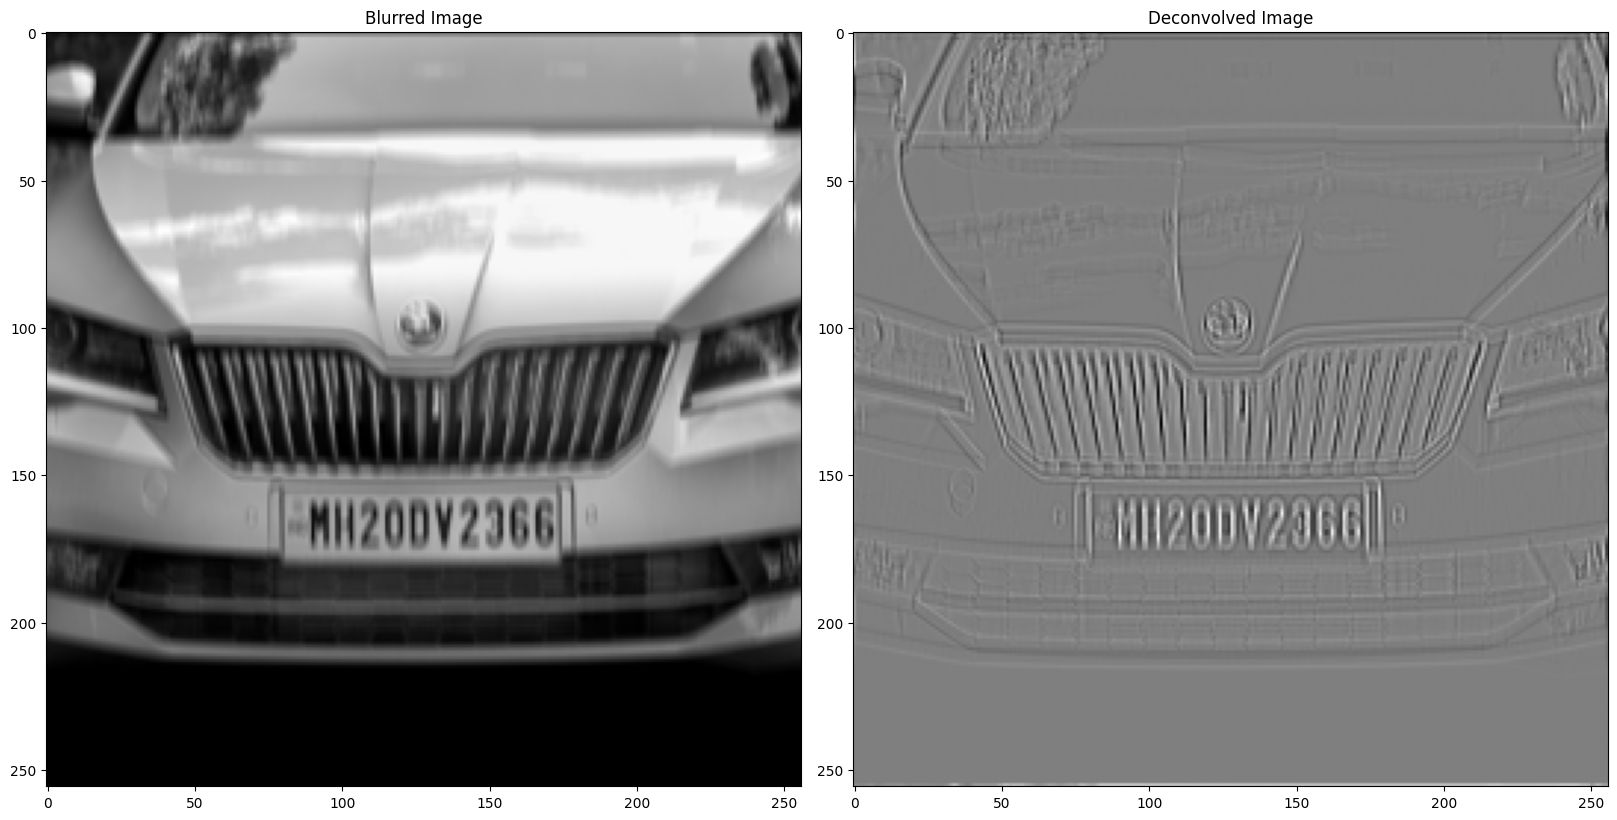

PSNR of Blurred Image: 15.400863780889518
PSNR of Deconvolved Image: -2.68898362664582


In [ ]:
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import numpy as np

# Assuming `img` is already defined and is a grayscale image
original_image = img.copy().astype(np.float32)

# # Blurring kernel
# kernel = np.array([[0, 1, 0],
#                    [0, 1, 0],
#                    [0, 1, 0]], dtype=np.float32)
# kernel = np.array([[1],
#                    [1],
#                    [1],
#                    [1],
#                    [1]], dtype=np.float32)
# kernel /= kernel.sum()

# kernel = np.array([[1, 1, 1, 1, 1]], dtype=np.float32)
# kernel /= kernel.sum()

kernel = np.array([[0, 0, 1, 0, 0],
                   [0, 0, 1, 0, 0],
                   [0, 0, 1, 0, 0],
                   [0, 0, 1, 0, 0],
                   [0, 0, 1, 0, 0]], dtype=np.float32)
kernel /= kernel.sum()

conv_img = convolve2d(original_image, kernel, mode='same')

# Deblurring kernel
deblur_kernel = np.array([[0, 1, 0],
                          [1,  -4,  1],
                          [0,  1,  0]], dtype=np.float32)
# deblur_kernel /= deblur_kernel.sum()
# deblur_kernel = np.array([[-1, -1, -1, -1, -1],
#                    [0, 0, 0, 0, 0],
#                    [0, 0, 1000, 0, 0],
#                    [0, 0, 0, 0, 0],
#                    [1, 1, 1, 1, 1]], dtype=np.float32)

deconvolved_img = convolve2d(conv_img, deblur_kernel, mode='same', boundary='wrap')

# Plot all images at once
plt.figure(figsize=(24, 8))
# plt.subplot(131), plt.imshow(original_image, cmap='gray'), plt.title("Original Image")
plt.subplot(132), plt.imshow(conv_img, cmap='gray'), plt.title("Blurred Image")
plt.subplot(133), plt.imshow(deconvolved_img, cmap='gray'), plt.title("Deconvolved Image")
plt.tight_layout()
plt.show()

# psnr of images
mse_recovery = np.mean((original_image - conv_img) ** 2)
max_val = np.max(x)
psnr_recovery = 10 * np.log10(max_val**2 / mse_recovery)
''
print("PSNR of Blurred Image:", psnr_recovery)

mse_recovery_deconvolved = np.mean((original_image - deconvolved_img) ** 2)
psnr_recovery_deconvolved = 10 * np.log10(max_val**2 / mse_recovery_deconvolved)

print("PSNR of Deconvolved Image:", psnr_recovery_deconvolved)